# Assignment - 03

# Kavya Shah
# SUID: 330126500
# PIN: 68
# Email: kshah28@syr.edu

In [36]:
# Import Libraries 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings('ignore')




In [3]:
# Upload data set 

dataset = pd.read_csv('61-70.csv')
dataset

,univ_rank,first_initial,last_initial,cit_2017,cit_2018,cit_2019,cit_2020,cit_2021,cit_2022,h_index,i_10_index
0,61,S,B,239,291,298,360,447,397,15,17
1,61,C,F,811,774,677,514,562,431,55,107
2,61,J,F,262,279,264,215,208,217,10,10
3,61,D,F,53,54,148,151,280,344,15,16
4,61,L,G,8,35,200,437,560,741,8,7
...,...,...,...,...,...,...,...,...,...,...,...
95,70,A,J,157,147,153,106,145,124,32,121
96,70,S,G,212,155,130,108,123,129,34,78
97,70,N,K,44,56,53,74,60,115,12,15
98,70,C,A,516,534,510,625,614,638,44,92


In [4]:
# Copy dataset into data frame

df = dataset.copy()
df.head()

,univ_rank,first_initial,last_initial,cit_2017,cit_2018,cit_2019,cit_2020,cit_2021,cit_2022,h_index,i_10_index
0,61,S,B,239,291,298,360,447,397,15,17
1,61,C,F,811,774,677,514,562,431,55,107
2,61,J,F,262,279,264,215,208,217,10,10
3,61,D,F,53,54,148,151,280,344,15,16
4,61,L,G,8,35,200,437,560,741,8,7


In [5]:
# Explore and Analysis of our data set


# Let's see the shape, info and statistical distribution of our data set 
df.shape

(100, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   univ_rank      100 non-null    int64 
 1   first_initial  100 non-null    object
 2   last_initial   100 non-null    object
 3   cit_2017       100 non-null    object
 4   cit_2018       100 non-null    int64 
 5   cit_2019       100 non-null    int64 
 6   cit_2020       100 non-null    int64 
 7   cit_2021       100 non-null    int64 
 8   cit_2022       100 non-null    int64 
 9   h_index        100 non-null    int64 
 10  i_10_index     100 non-null    int64 
dtypes: int64(8), object(3)
memory usage: 8.7+ KB


In [7]:
# Converting the cit_2017 column to Dtype int64 because currently it is object 
df['cit_2017'] = df['cit_2017'].str.replace(',',"").astype(int)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   univ_rank      100 non-null    int64 
 1   first_initial  100 non-null    object
 2   last_initial   100 non-null    object
 3   cit_2017       100 non-null    int64 
 4   cit_2018       100 non-null    int64 
 5   cit_2019       100 non-null    int64 
 6   cit_2020       100 non-null    int64 
 7   cit_2021       100 non-null    int64 
 8   cit_2022       100 non-null    int64 
 9   h_index        100 non-null    int64 
 10  i_10_index     100 non-null    int64 
dtypes: int64(9), object(2)
memory usage: 8.7+ KB


In [9]:
# describe will give you the statistical information of eac column of the dataset 
df.describe()

,univ_rank,cit_2017,cit_2018,cit_2019,cit_2020,cit_2021,cit_2022,h_index,i_10_index
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.00000
mean,65.500000,276.950000,297.210000,286.510000,299.510000,306.37000,373.800000,26.430000,50.69000
std,2.886751,342.992104,420.642469,338.664802,348.377292,347.44367,746.157957,14.797116,41.38357
min,61.000000,0.000000,0.000000,0.000000,3.000000,7.00000,2.000000,5.000000,5.00000
25%,63.000000,52.750000,53.250000,66.000000,84.500000,77.75000,84.750000,14.750000,16.75000
50%,65.500000,145.000000,131.000000,130.500000,148.500000,156.50000,148.000000,24.000000,41.00000
75%,68.000000,374.250000,349.500000,406.000000,425.750000,456.00000,424.500000,35.250000,75.50000
max,70.000000,1721.000000,2942.000000,1771.000000,1776.000000,1804.00000,6902.000000,66.000000,223.00000


In [10]:
# Check if there are any duplicated values in the dataset / dataframe
df.duplicated().sum()

0

In [11]:
# Check if there are any null values in the dataframe
df.isna().sum()

univ_rank        0
first_initial    0
last_initial     0
cit_2017         0
cit_2018         0
cit_2019         0
cit_2020         0
cit_2021         0
cit_2022         0
h_index          0
i_10_index       0
dtype: int64

In [12]:
# Extract columns: cit_2017 to cit_2021 for clustering 

# X = df[['cit_2017','cit_2018', 'cit_2019','cit_2020','cit_2021' ]]
df.shape

(100, 11)

In [13]:
# Y = df[['cit_2022']]
# Y.shape

In [14]:
# Splitiing the data into training (80 %) and testing (20 %) set using sklearn 

train_data, test_data = train_test_split(df, train_size = 0.80, test_size = 0.20, random_state = 42)

In [15]:
train_data.shape

(80, 11)

In [16]:
test_data.shape

(20, 11)

In [17]:
train_features = train_data[['cit_2017', 'cit_2018', 'cit_2019', 'cit_2020', 'cit_2021']]
test_features = test_data[['cit_2017', 'cit_2018', 'cit_2019', 'cit_2020', 'cit_2021']]

In [18]:
# Y_test.shape

In [19]:
# Normalizing both the train and test data

from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [21]:
train_normalize = scaler.fit_transform(train_features)
test_normalize = scaler.transform(test_features)

In [22]:
train_normalize.shape
train_normalize[0:5]

array([[0.00232423, 0.00238257, 0.00734049, 0.01692047, 0.01112966],
       [0.05113306, 0.02859088, 0.04009034, 0.0676819 , 0.04229271],
       [0.06624056, 0.04118448, 0.07340486, 0.10941906, 0.0951586 ],
       [0.53689715, 0.32130701, 0.57312253, 0.53412296, 0.46911519],
       [0.09587449, 0.04799183, 0.06832298, 0.08403835, 0.06010017]])

In [23]:
test_normalize.shape
test_normalize[0:5]

array([[0.72690296, 0.35976855, 0.56126482, 0.51043429, 0.46132443],
       [0.04590354, 0.02961198, 0.0525127 , 0.05640158, 0.03895381],
       [0.10865776, 0.04152485, 0.06267645, 0.0750141 , 0.03839733],
       [0.09819872, 0.07011572, 0.14737436, 0.16243655, 0.21758486],
       [0.08657757, 0.05411845, 0.07735743, 0.06937394, 0.06510851]])

In [24]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


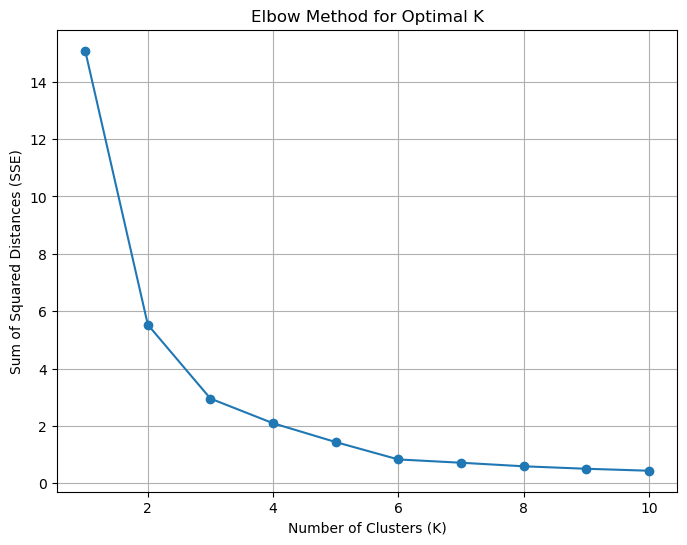

Optimal value of k is:  3


In [25]:
# Find the optimal number of k clusters using elbow method on the normalized X_train dataset:

#Initialize the sum of squared distances for different values of k
sum_sd = []

# Trying range of k values and calculating the sse's for each k value
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(train_normalize)
    sum_sd.append(kmeans.inertia_)
 

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sum_sd, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.grid(True)
plt.show()


# Print the Elbow-point / the optimal number of clusters using kneed

from kneed import KneeLocator

elbow_point = KneeLocator(range(1,11), sum_sd, curve = 'convex', direction = 'decreasing')
optimal_k = elbow_point.elbow
print("Optimal value of k is: ", optimal_k)

In [26]:
# Perforoming the K-means clustering 

clusters = KMeans(n_clusters = 3, random_state = 42)
clusters.fit_predict(train_normalize)
train_data['clusters'] = clusters.labels_
train_data


,univ_rank,first_initial,last_initial,cit_2017,cit_2018,cit_2019,cit_2020,cit_2021,cit_2022,h_index,i_10_index,clusters
55,66,H,C,4,11,13,33,27,43,7,6,0
88,69,A,M,88,88,71,123,83,102,16,23,0
26,63,M,G,114,125,130,197,178,195,24,39,0
42,65,R,J,924,948,1015,950,850,734,53,109,1
69,67,R,C,165,145,121,152,115,143,21,31,0
...,...,...,...,...,...,...,...,...,...,...,...,...
60,67,H,G,305,304,269,240,211,231,33,61,0
71,68,Y,J,77,64,104,111,91,106,19,44,0
14,62,P,V,144,99,97,169,140,103,26,41,0
92,70,A,B,934,985,1086,1272,1298,1279,46,77,1


In [27]:
# Predict the cluster for each test data point
# clusters = KMeans(n_clusters = 3, random_state = 42)
test_clusters = clusters.predict(test_normalize)
test_data['test_clusters'] = test_clusters
test_data

,univ_rank,first_initial,last_initial,cit_2017,cit_2018,cit_2019,cit_2020,cit_2021,cit_2022,h_index,i_10_index,test_clusters
83,69,M,F,1251,1061,994,908,836,782,65,158,1
53,66,Y,D,79,91,93,103,77,81,18,37,0
70,68,S,B,187,126,111,136,76,80,29,74,0
45,65,L,C,169,210,261,291,398,404,31,60,0
44,65,F,D,149,163,137,126,124,89,14,18,0
39,64,M,A,0,26,63,69,94,69,11,13,0
22,63,S,H,100,76,93,110,111,96,11,11,0
80,69,F,V,379,360,321,309,282,297,57,160,2
10,62,P,W,38,73,126,211,312,422,24,55,0
0,61,S,B,239,291,298,360,447,397,15,17,2


In [28]:
# Get the cluster assignments for each data point in the training set
train_cluster_labels = clusters.labels_
train_cluster_labels

array([0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0,
       0, 0, 2, 2, 1, 0, 2, 0, 1, 0, 2, 1, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0,
       2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 1, 2, 0, 2, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int32)

In [29]:
# 1. Same as the 2022 citation number of the nearest neighbor from the training set:
# For each test data point, find the nearest neighbor from the training set that belongs to the same cluster.
# Use the 2022 citation number of this nearest neighbor as the prediction for the test data point.

In [30]:
nearest_neighbour_prediction = []
nearest_neighbour_differences = []

for i in range(len(test_data['cit_2022'])):
    nn_index = train_cluster_labels[i]
    nearest_neighbor_citations = train_data['cit_2022'].iloc[nn_index]
    nearest_neighbour_prediction.append(nearest_neighbor_citations)
    nearest_neighbour_differences.append(abs(nearest_neighbor_citations - test_data.iloc[i,0]))


In [31]:
# 2. same as the point nearest the cluster centroid;

In [32]:
nearest_centroid_prediction = []
nearest_centroid_difference = []

for i in range(len(test_data['cit_2022'])):
    cluster_lb = train_cluster_labels[i]
    cluster_index = (train_cluster_labels == cluster_lb)
    nearest_dt_pt = train_data[cluster_index]['cit_2022'].iloc[0]
    nearest_centroid_prediction.append(nearest_dt_pt)
    nearest_centroid_difference.append(abs(nearest_dt_pt - test_data['cit_2022']))
    

In [33]:
# 3. average of all others from the training set in the same cluster.

In [34]:
avg_cluster_prediction = []
avg_differences_cluster = []

for i in range(len(test_data['cit_2022'])):
    cluster_lb = train_cluster_labels[i]
    cluster_index = (train_cluster_labels == cluster_lb)
    average_cit_2022 = train_data[cluster_index]['cit_2022'].mean()
    avg_cluster_prediction.append(average_cit_2022)
    avg_differences_cluster.append(abs(average_cit_2022 - test_data.iloc[i,0]))
    

In [35]:
# Calculate the average difference magnitude for each approach
ad_nn = round(sum(nearest_neighbour_differences) / len(nearest_neighbour_differences), 2)
# Calculate the average difference magnitude for the "Nearest Cluster Centroid" approach
ad_nc = round(np.mean(np.abs(nearest_centroid_difference)), 2)
ad_ac = round(sum(avg_differences_cluster) / len(avg_differences_cluster), 2)


print('average_difference_nearest_neighbor: ', ad_nn)
print('average_difference_nearest_centroid: ', ad_nc)
print('average_difference_average_in_cluster: ', ad_ac)


average_difference_nearest_neighbor:  49.3
average_difference_nearest_centroid:  262.45
average_difference_average_in_cluster:  242.05
